# Importar librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

## Lectura de archivo 

In [3]:
data = pd.read_csv('./datasets/logs_exp.csv', sep='\t')

## Preparación de datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
data.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [6]:
data.duplicated().sum()

413

In [7]:
data.columns = map(str.lower, data.columns)
print(data.columns)

Index(['eventname', 'deviceidhash', 'eventtimestamp', 'expid'], dtype='object')


In [8]:
data['eventtimestamp']  = pd.to_datetime(data['eventtimestamp'], unit = 's')

In [9]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [10]:
data['fecha']= data['eventtimestamp'].astype('datetime64[Y]')

In [11]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid,fecha
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-01-01
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-01-01
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-01-01
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-01-01
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-01-01


## Estudiar y comprovar datos

### ¿Cuántos eventos hay en los registros?


In [12]:
data_eventos = data['eventname'].agg('count')

In [13]:
data_eventos

244126

### ¿Cuántos usuarios y usuarias hay en los registros?

In [14]:
usuarios_registrados = data['deviceidhash'].agg(['count'])

In [15]:
usuarios_registrados

count    244126
Name: deviceidhash, dtype: int64

In [16]:
promedio_de_usuarios_por_evento = usuarios_registrados/ data_eventos

In [17]:
promedio_de_usuarios_por_evento

count    1.0
Name: deviceidhash, dtype: float64

### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?


In [18]:
print('fecha de inicio:', data['eventtimestamp'].min())
print('fecha de final:',  data['eventtimestamp'].max())

fecha de inicio: 2019-07-25 04:43:36
fecha de final: 2019-08-07 21:15:17


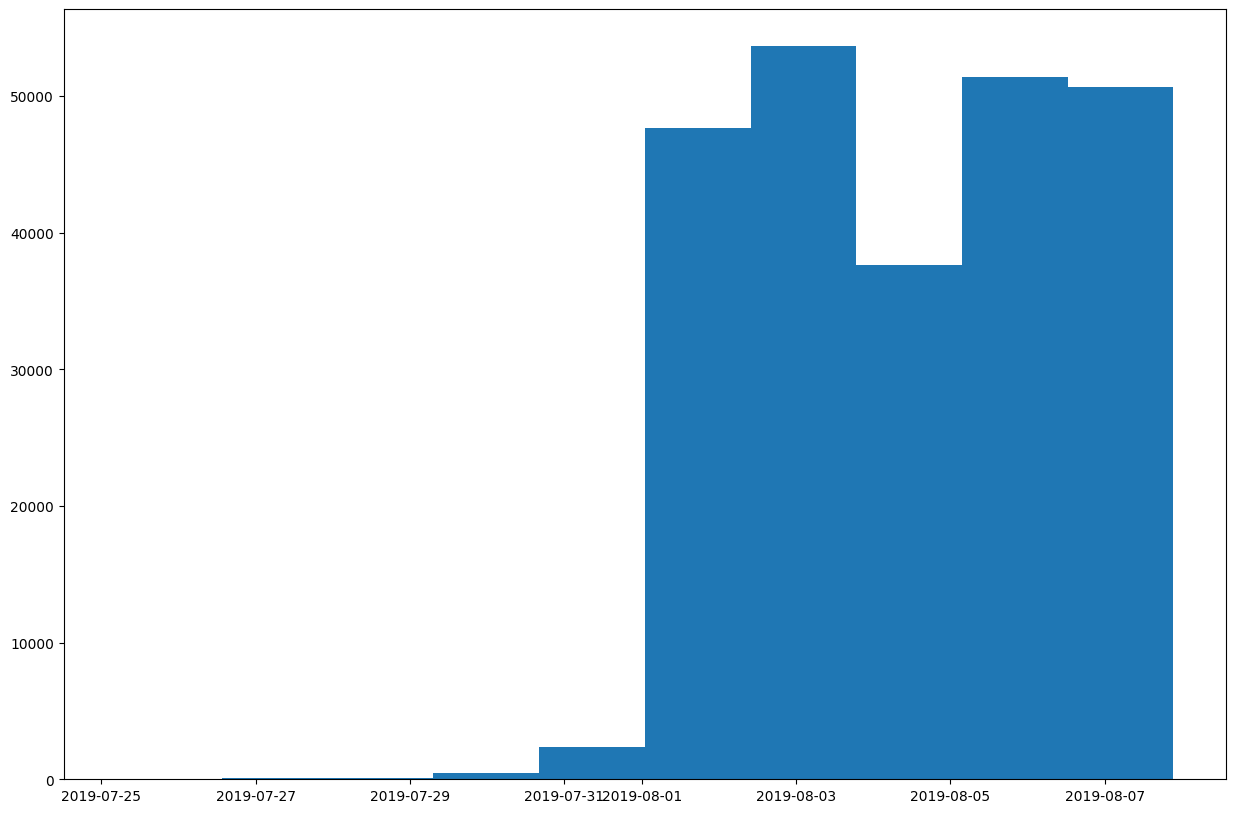

In [19]:
plt.subplots(figsize=(15,10))
plt.hist(data['eventtimestamp'], )
plt.show() 

In [20]:
Q1 = np.percentile(data['eventtimestamp'].apply(lambda x: x.timestamp()),25)
Q3 = np.percentile(data['eventtimestamp'].apply(lambda x: x.timestamp()),75)
rango= Q3-Q1
limite_inf = Q1-1.5*rango 
limite_inf_datetime = pd.to_datetime(limite_inf, unit = 's')

print(limite_inf_datetime)

2019-07-28 02:08:04.124999936


In [21]:
datos_filtrados= data[(data['eventtimestamp']> '2019-08-01')]
print(datos_filtrados.head())


               eventname         deviceidhash      eventtimestamp  expid  \
2828            Tutorial  3737462046622621720 2019-08-01 00:07:28    246   
2829    MainScreenAppear  3737462046622621720 2019-08-01 00:08:00    246   
2830    MainScreenAppear  3737462046622621720 2019-08-01 00:08:55    246   
2831  OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58    246   
2832    MainScreenAppear  1433840883824088890 2019-08-01 00:08:59    247   

          fecha  
2828 2019-01-01  
2829 2019-01-01  
2830 2019-01-01  
2831 2019-01-01  
2832 2019-01-01  


In [22]:
datos_filtrados = datos_filtrados.reset_index(drop=True)

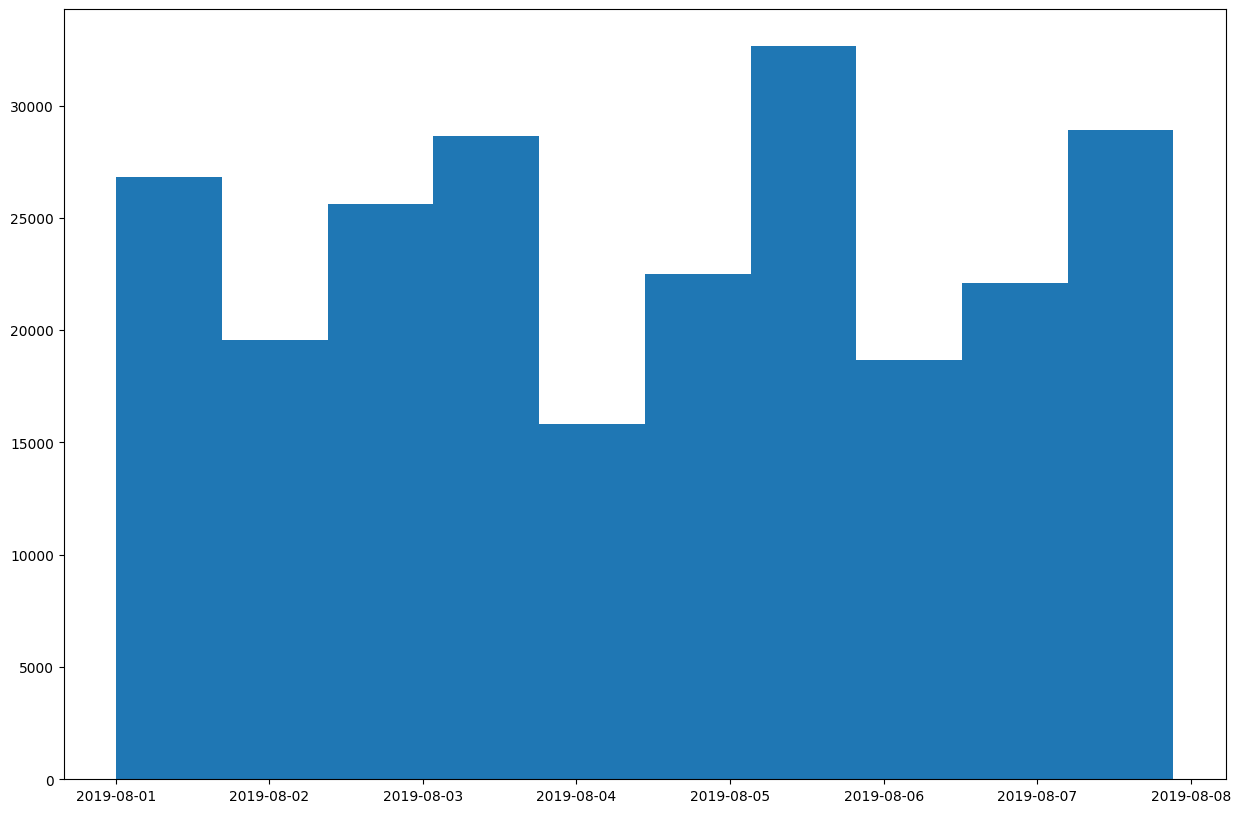

In [23]:
plt.subplots(figsize=(15,10))
plt.hist(datos_filtrados['eventtimestamp'])
plt.show()

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?


In [24]:
eventos_totales = datos_filtrados['eventname'].agg('count')
eventos_totales 

241298

In [25]:
print('eventos en datos origunales', data_eventos)
print()
print('eventos en datos filtrados', eventos_totales)

eventos en datos origunales 244126

eventos en datos filtrados 241298


In [26]:
porsentajes_evento = data_eventos/data_eventos*100
proporcion_filtro_evento = eventos_totales/data_eventos*100
proporcion_filtro_evento

98.84158180611652

In [27]:
usuarios_totales = datos_filtrados['deviceidhash'].agg('count')
usuarios_totales 

241298

In [28]:
print('usuarios en datos originales', usuarios_registrados)
print()
print('usuarios en datos filtrados', usuarios_totales)

usuarios en datos originales count    244126
Name: deviceidhash, dtype: int64

usuarios en datos filtrados 241298


In [29]:
porsentajes_usuarios = usuarios_registrados/usuarios_registrados*100
proporcion_filtro_usuarios = usuarios_totales/usuarios_registrados*100
proporcion_filtro_usuarios

count    98.841582
Name: deviceidhash, dtype: float64

###### En el total de eventos y total de usuarios se perdio al rededor de un 1.2%

### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales

In [30]:
datos_filtrados.groupby('expid').agg({'deviceidhash':'count'})

,deviceidhash
expid,
246,79425
247,77147
248,84726


## Estudiar el enbudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.


In [31]:
datos_filtrados.head()

,eventname,deviceidhash,eventtimestamp,expid,fecha
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-01-01
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-01-01
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-01-01
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-01-01
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-01-01


In [32]:
datos_filtrados['eventname'].unique()

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

In [33]:
frecuencia_de_evento = datos_filtrados['eventname'].value_counts() 

In [34]:
frecuencia_de_evento

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: eventname, dtype: int64

### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.


In [35]:
cantidad_de_usuarios= datos_filtrados.groupby('eventname').agg({'deviceidhash': ['count', 'nunique', ]})
cantidad_de_usuarios.columns= ['numero_acciones', 'numero_de_usuarios']
cantidad_de_usuarios.sort_values(ascending =False, by='numero_de_usuarios')

,numero_acciones,numero_de_usuarios
eventname,,
MainScreenAppear,117431,7419
OffersScreenAppear,46350,4593
CartScreenAppear,42365,3734
PaymentScreenSuccessful,34113,3539
Tutorial,1039,840


In [36]:
cantidad_de_usuarios['proporcion_de_usuarios'] = (cantidad_de_usuarios['numero_de_usuarios']/cantidad_de_usuarios['numero_de_usuarios'].sum())*100
cantidad_de_usuarios.sort_values(ascending =False, by='numero_de_usuarios')

,numero_acciones,numero_de_usuarios,proporcion_de_usuarios
eventname,,,
MainScreenAppear,117431,7419,36.864596
OffersScreenAppear,46350,4593,22.822360
CartScreenAppear,42365,3734,18.554037
PaymentScreenSuccessful,34113,3539,17.585093
Tutorial,1039,840,4.173913


### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.


In [37]:
cantidad_de_usuarios.sort_values(ascending =False, by='numero_de_usuarios')

,numero_acciones,numero_de_usuarios,proporcion_de_usuarios
eventname,,,
MainScreenAppear,117431,7419,36.864596
OffersScreenAppear,46350,4593,22.822360
CartScreenAppear,42365,3734,18.554037
PaymentScreenSuccessful,34113,3539,17.585093
Tutorial,1039,840,4.173913


###### Concidero que el orden en el que ocurren los eventos es deacuerdo a esta tabla ya que es posible que por ello no muchos usuarios no lleguen a concretar la compra por falta del tuturial en un inicio. por lo tanto no todos los que compran lo ven ya que no lo encuentran ya necesario

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).


In [38]:
users = datos_filtrados.pivot_table( index='deviceidhash', columns='eventname', values= 'eventtimestamp', aggfunc='min')
users.head()

eventname,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
deviceidhash,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT


In [39]:
step_1 = ~users['MainScreenAppear'].isna() 
step_2 =  step_1 & (users['OffersScreenAppear'] >  users['MainScreenAppear']) 
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear']) 
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
step_5 = step_4 &(users['Tutorial'] > users['PaymentScreenSuccessful'])

In [40]:
MainScreenAppear = users[step_1].shape[0] 
OffersScreenAppear = users[step_2].shape[0] 
CartScreenAppear = users[step_3].shape[0]
PaymentScreenSuccessful = users[step_4].shape[0]
Tutorial = users[step_5].shape[0]

In [41]:
print('Usuarios que ingresan:', MainScreenAppear)
print('Usuarios que navegan:', OffersScreenAppear)
print('Usuarios que agregan a carrito:', CartScreenAppear)
print('Usuarios que realizan pago:', PaymentScreenSuccessful)
print('Usuarios que acceden a tutorial', Tutorial)

Usuarios que ingresan: 7419
Usuarios que navegan: 4201
Usuarios que agregan a carrito: 1767
Usuarios que realizan pago: 454
Usuarios que acceden a tutorial 1


In [42]:
proporcion1 = MainScreenAppear/MainScreenAppear*100
proporcion2 = OffersScreenAppear/MainScreenAppear*100
proporcion3 = CartScreenAppear/OffersScreenAppear*100
proporcion4 = PaymentScreenSuccessful/CartScreenAppear*100
proporcion5 = Tutorial/PaymentScreenSuccessful*100

In [43]:
print('laproporcion de MainScreenAppear es:', proporcion1)
print('la proporcion de MainScreenAppear es:',proporcion2)
print('la propprcion de  CartScreenAppear es:',proporcion3)
print('la proporcion de PaymentScreenSuccessful es:',proporcion4)
print('la proporcion de tutorial es:',proporcion5)

laproporcion de MainScreenAppear es: 100.0
la proporcion de MainScreenAppear es: 56.62488205957676
la propprcion de  CartScreenAppear es: 42.06141394905975
la proporcion de PaymentScreenSuccessful es: 25.693265421618563
la proporcion de tutorial es: 0.22026431718061676


### ¿En qué etapa pierdes más usuarios y usuarias?


###### En la de ofertas, ya que al ingresar a nuestra pagina contamos con 7438, mientas que al momento de llegar a las ofertas solo tenemos 4075, debemos investigar mas la razon, en relacion de proporciones se pierde casi un 46%.

### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [44]:
porcentaje_de_usuarios = (PaymentScreenSuccessful/MainScreenAppear)*100
print('Porsentaje de usuarios que terminan:', porcentaje_de_usuarios)

Porsentaje de usuarios que terminan: 6.119423102844049


## Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?


In [45]:
datos_filtrados['expid'].unique()

array([246, 247, 248])

In [46]:
filtro_unicos= datos_filtrados.groupby('expid')['deviceidhash'].nunique()

In [47]:
filtro_unicos

expid
246    2484
247    2513
248    2537
Name: deviceidhash, dtype: int64

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.


In [48]:
grupos_de_control = datos_filtrados.pivot_table(index= 'eventname',columns = 'expid', values= 'deviceidhash', aggfunc= 'nunique')
grupos_de_control

expid,246,247,248
eventname,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


In [49]:
usuarios_por_grupo1 = grupos_de_control[246]
usuarios_por_grupo2 = grupos_de_control[247]

In [50]:
usuarios_por_grupo1

eventname
CartScreenAppear           1266
MainScreenAppear           2450
OffersScreenAppear         1542
PaymentScreenSuccessful    1200
Tutorial                    278
Name: 246, dtype: int64

In [51]:
usuarios_por_grupo2

eventname
CartScreenAppear           1238
MainScreenAppear           2476
OffersScreenAppear         1520
PaymentScreenSuccessful    1158
Tutorial                    283
Name: 247, dtype: int64

In [52]:
t_stat,p_valor =st.ttest_ind(usuarios_por_grupo1,usuarios_por_grupo2)
print('t-stadistica:', p_valor)
if p_valor < 0.05:
        print('Hay una diferencia estadistia significativa')
else:
    print('No hay diferencia significativa')

t-stadistica: 0.9809573661651472
No hay diferencia significativa


###### A realizar una prueva de hipotesis entre nuestros grupos uno y dos podemos darnos cuenta que no cuentan con diferencia  estadistica significativa 

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?


In [53]:
grupo_de_control_= grupos_de_control.sort_values(ascending=False, by= 246)

In [54]:
grupo_de_control_

expid,246,247,248
eventname,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


In [63]:
def test_hipotesis(grupo1, grupo2, prueva1, prueva2, alpha= 0.05):
    # obteniendo proporcion de exito en primer grupo
    p1 = grupo1/prueva1
    # obteniendo proporcion de exito en segundo grupo
    p2 = grupo2/prueva2
    # proporcion combinada de exitos 
    p_comb = (grupo1 + grupo2)/(prueva1 + prueva2)
    # diferencia de proporciones
    dif_prop = p1 - p2
    # estadistica en desviasion estanda prueva z
    z_value = dif_prop/ math.sqrt(p_comb*(1-p_comb)* (1/prueva1 + 1/prueva2))
    # revisar distribucion normal
    distribucion = st.norm(0,1)
    # obtener p_value
    p_value = (1-distribucion.cdf(abs(z_value)))*2
    print('p_value', p_value)
    if p_value < alpha:
        print('Se recahaza la hipotesis nula')
    else:
        print('No se rechaza la hipotesis nula')
        

In [64]:
test_hipotesis(grupo_de_control_.loc['MainScreenAppear', 246],
               grupo_de_control_.loc['MainScreenAppear',247],
               filtro_unicos.loc[246], filtro_unicos.loc[247])

2450 2476
p_value 0.7570597232046099
No se rechaza la hipotesis nula


In [57]:
def hip_eventos(evento_grupo, usuarios_grupo, evento, exp1, exp2):
    f1= grupo_de_control_.loc[evento, exp1]/filtro_unicos.loc[exp1]
    f2= grupo_de_control_.loc[evento, exp2]/filtro_unicos.loc[exp2]
    print(f"{f1} con {evento} evento en grupo {exp1}")
    print(f"{f2} con {evento} evento en grupo {exp2}")
    test_hipotesis(grupo_de_control_.loc[evento, exp1],
                    grupo_de_control_.loc[evento, exp2],
                    filtro_unicos.loc[exp1],
                    filtro_unicos.loc[exp2]
                    )

In [58]:
for evento in grupo_de_control_.index:
    hip_eventos(grupo_de_control_, filtro_unicos, evento, 246, 247)
    print()
    
    

0.9863123993558777 con MainScreenAppear evento en grupo 246
0.9852765618782332 con MainScreenAppear evento en grupo 247
p_value 0.7570597232046099
No se rechaza la hipotesis nula

0.6207729468599034 con OffersScreenAppear evento en grupo 246
0.6048547552725826 con OffersScreenAppear evento en grupo 247
p_value 0.2480954578522181
No se rechaza la hipotesis nula

0.5096618357487923 con CartScreenAppear evento en grupo 246
0.4926382809391166 con CartScreenAppear evento en grupo 247
p_value 0.22883372237997213
No se rechaza la hipotesis nula

0.4830917874396135 con PaymentScreenSuccessful evento en grupo 246
0.46080382013529647 con PaymentScreenSuccessful evento en grupo 247
p_value 0.11456679313141849
No se rechaza la hipotesis nula

0.11191626409017713 con Tutorial evento en grupo 246
0.11261440509351373 con Tutorial evento en grupo 247
p_value 0.9376996189257114
No se rechaza la hipotesis nula



###### puedo observar que ninguno de los valores tiene en ninguno de los grupos existe una diferncia significativa, y esta con proporciones relativamente similares, en cada evento.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?


In [59]:
for evento in grupo_de_control_.index:
    hip_eventos(grupo_de_control_, filtro_unicos, evento, 247, 248)
    print()
    

0.9852765618782332 con MainScreenAppear evento en grupo 247
0.9826566811194324 con MainScreenAppear evento en grupo 248
p_value 0.4587053616621515
No se rechaza la hipotesis nula

0.6048547552725826 con OffersScreenAppear evento en grupo 247
0.6034686637761135 con OffersScreenAppear evento en grupo 248
p_value 0.9197817830592261
No se rechaza la hipotesis nula

0.4926382809391166 con CartScreenAppear evento en grupo 247
0.48482459597950334 con CartScreenAppear evento en grupo 248
p_value 0.5786197879539783
No se rechaza la hipotesis nula

0.46080382013529647 con PaymentScreenSuccessful evento en grupo 247
0.46551044540796216 con PaymentScreenSuccessful evento en grupo 248
p_value 0.7373415053803964
No se rechaza la hipotesis nula

0.11261440509351373 con Tutorial evento en grupo 247
0.10997240835632636 con Tutorial evento en grupo 248
p_value 0.765323922474501
No se rechaza la hipotesis nula



In [60]:
for evento in grupo_de_control_.index:
    hip_eventos(grupo_de_control_, filtro_unicos, evento, 246, 248)
    print()

0.9863123993558777 con MainScreenAppear evento en grupo 246
0.9826566811194324 con MainScreenAppear evento en grupo 248
p_value 0.2949721933554552
No se rechaza la hipotesis nula

0.6207729468599034 con OffersScreenAppear evento en grupo 246
0.6034686637761135 con OffersScreenAppear evento en grupo 248
p_value 0.20836205402738917
No se rechaza la hipotesis nula

0.5096618357487923 con CartScreenAppear evento en grupo 246
0.48482459597950334 con CartScreenAppear evento en grupo 248
p_value 0.07842923237520116
No se rechaza la hipotesis nula

0.4830917874396135 con PaymentScreenSuccessful evento en grupo 246
0.46551044540796216 con PaymentScreenSuccessful evento en grupo 248
p_value 0.2122553275697796
No se rechaza la hipotesis nula

0.11191626409017713 con Tutorial evento en grupo 246
0.10997240835632636 con Tutorial evento en grupo 248
p_value 0.8264294010087645
No se rechaza la hipotesis nula



### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [61]:
def test_hipotesis(grupo1, grupo2, prueva1, prueva2, alpha= 0.1):
    # obteniendo proporcion de exito en primer grupo
    p1 = grupo1/prueva1
    # obteniendo proporcion de exito en segundo grupo
    p2 = grupo2/prueva2
    # proporcion combinada de exitos 
    p_comb = (grupo1 + grupo2)/(prueva1 + prueva2)
    # diferencia de proporciones
    dif_prop = p1 - p2
    # estadistica en desviasion estanda prueva z
    z_value = dif_prop/ math.sqrt(p_comb*(1-p_comb)* (1/prueva1 + 1/prueva2))
    # revisar distribucion normal
    distribucion = st.norm(0,1)
    # obtener p_value
    p_value = (1-distribucion.cdf(abs(z_value)))*2
    print('p_value', p_value)
    if p_value < alpha:
        print('Se recahaza la hipotesis nula')
    else:
        print('No se rechaza la hipotesis nula')
        

In [62]:
for evento in grupo_de_control_.index:
    hip_eventos(grupo_de_control_, filtro_unicos, evento, 246, 247)
    print()

0.9863123993558777 con MainScreenAppear evento en grupo 246
0.9852765618782332 con MainScreenAppear evento en grupo 247
p_value 0.7570597232046099
No se rechaza la hipotesis nula

0.6207729468599034 con OffersScreenAppear evento en grupo 246
0.6048547552725826 con OffersScreenAppear evento en grupo 247
p_value 0.2480954578522181
No se rechaza la hipotesis nula

0.5096618357487923 con CartScreenAppear evento en grupo 246
0.4926382809391166 con CartScreenAppear evento en grupo 247
p_value 0.22883372237997213
No se rechaza la hipotesis nula

0.4830917874396135 con PaymentScreenSuccessful evento en grupo 246
0.46080382013529647 con PaymentScreenSuccessful evento en grupo 247
p_value 0.11456679313141849
No se rechaza la hipotesis nula

0.11191626409017713 con Tutorial evento en grupo 246
0.11261440509351373 con Tutorial evento en grupo 247
p_value 0.9376996189257114
No se rechaza la hipotesis nula



###### Aun cambiando le nivel de significancia, nuestras hipotesis siguen siendo relativamente similares entre si